# NBA Data Storytelling

## Questions to answer

How much do NBA team stats matter in the regular season compared to the NBA champions? Example, does the team that leads the league in points per game or has the least amount of points given up per game have good playoff runs?

To answer this question, we can look at the NBA 2022-2023 team stats and compare it to the teams that made the playoffs as well as the Finals winners and runner ups in order to see how much these stats matter.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('data.csv')

df

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Sacramento Kings*,82,241.8,43.6,88.2,0.494,13.8,37.3,0.369,...,0.790,9.5,32.9,42.5,27.3,7.0,3.4,13.5,19.7,120.7
1,2.0,Golden State Warriors*,82,241.8,43.1,90.2,0.479,16.6,43.2,0.385,...,0.794,10.5,34.1,44.6,29.8,7.2,3.9,16.3,21.4,118.9
2,3.0,Atlanta Hawks*,82,242.1,44.6,92.4,0.483,10.8,30.5,0.352,...,0.818,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4
3,4.0,Boston Celtics*,82,243.7,42.2,88.8,0.475,16.0,42.6,0.377,...,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,117.9
4,5.0,Oklahoma City Thunder*,82,242.1,43.1,92.6,0.465,12.1,34.1,0.356,...,0.809,11.4,32.3,43.6,24.4,8.2,4.2,13.0,21.0,117.5
5,6.0,Los Angeles Lakers*,82,242.4,42.9,89.0,0.482,10.8,31.2,0.346,...,0.775,10.0,35.7,45.7,25.3,6.4,4.6,14.1,17.9,117.2
6,7.0,Utah Jazz,82,241.5,42.5,89.8,0.473,13.3,37.8,0.353,...,0.786,11.8,34.1,45.9,26.0,6.1,5.2,15.4,20.5,117.1
7,8.0,Memphis Grizzlies*,82,241.2,43.7,92.1,0.475,12.0,34.2,0.351,...,0.733,12.0,34.6,46.6,26.0,8.3,5.8,13.6,20.0,116.9
8,9.0,Milwaukee Bucks*,82,241.8,42.7,90.4,0.473,14.8,40.3,0.368,...,0.743,11.1,37.5,48.6,25.8,6.4,4.9,14.6,18.1,116.9
9,10.0,Indiana Pacers,82,240.9,42.0,89.6,0.469,13.6,37.0,0.367,...,0.790,10.1,31.4,41.5,27.0,7.7,5.8,14.9,21.2,116.3


Let's first drop the league average as well as drop some columns that will not help us solve this problem such as games played and minutes played as well as team rank as we will make our own.

In [3]:
df = df.drop(['Rk', 'G', 'MP'], axis=1)
df = df[:-1]
df['Team'] = df['Team'].str.replace('*', '', regex=True)
df.set_index('Team', inplace = True)
df

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Team,,,,,,,,,,,,,,,,,,,,,
Sacramento Kings,43.6,88.2,0.494,13.8,37.3,0.369,29.8,50.9,0.586,19.8,...,0.790,9.5,32.9,42.5,27.3,7.0,3.4,13.5,19.7,120.7
Golden State Warriors,43.1,90.2,0.479,16.6,43.2,0.385,26.5,47.0,0.564,16.0,...,0.794,10.5,34.1,44.6,29.8,7.2,3.9,16.3,21.4,118.9
Atlanta Hawks,44.6,92.4,0.483,10.8,30.5,0.352,33.9,61.8,0.548,18.5,...,0.818,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4
Boston Celtics,42.2,88.8,0.475,16.0,42.6,0.377,26.2,46.2,0.567,17.5,...,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,117.9
Oklahoma City Thunder,43.1,92.6,0.465,12.1,34.1,0.356,31.0,58.5,0.530,19.2,...,0.809,11.4,32.3,43.6,24.4,8.2,4.2,13.0,21.0,117.5
Los Angeles Lakers,42.9,89.0,0.482,10.8,31.2,0.346,32.1,57.8,0.555,20.6,...,0.775,10.0,35.7,45.7,25.3,6.4,4.6,14.1,17.9,117.2
Utah Jazz,42.5,89.8,0.473,13.3,37.8,0.353,29.2,52.0,0.560,18.7,...,0.786,11.8,34.1,45.9,26.0,6.1,5.2,15.4,20.5,117.1
Memphis Grizzlies,43.7,92.1,0.475,12.0,34.2,0.351,31.7,57.9,0.548,17.5,...,0.733,12.0,34.6,46.6,26.0,8.3,5.8,13.6,20.0,116.9
Milwaukee Bucks,42.7,90.4,0.473,14.8,40.3,0.368,27.9,50.1,0.557,16.6,...,0.743,11.1,37.5,48.6,25.8,6.4,4.9,14.6,18.1,116.9


Let's now switch the dataframe into a rankings where 1 is the league leader and 30 is the league's worst.

In [4]:
dfRank = df.rank(ascending=False, method='min').astype(int)
dfRank

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Team,,,,,,,,,,,,,,,,,,,,,
Sacramento Kings,3,16,2,5,6,9,16,24,1,3,...,12,23,15,20,3,20,29,20,20,1
Golden State Warriors,5,8,12,1,1,2,28,28,6,29,...,9,14,6,8,1,14,25,1,3,2
Atlanta Hawks,1,3,9,24,28,21,1,1,16,16,...,3,9,12,10,18,15,11,28,24,3
Boston Celtics,13,15,14,2,2,6,29,29,5,23,...,4,20,3,7,7,25,6,23,24,4
Oklahoma City Thunder,5,1,24,15,12,17,9,4,24,9,...,5,8,20,14,21,4,22,26,7,5
Los Angeles Lakers,8,13,10,24,25,24,2,8,12,2,...,20,18,2,6,15,25,16,15,30,6
Utah Jazz,11,10,18,7,5,20,19,21,7,13,...,14,5,6,5,9,30,6,3,9,7
Memphis Grizzlies,2,4,14,16,11,22,6,5,16,23,...,30,4,4,2,9,2,2,19,16,8
Milwaukee Bucks,10,6,18,4,4,10,25,26,11,28,...,28,11,1,1,12,25,11,9,29,8


Let's first take a look at the NBA Champions Denver Nuggets.

In [5]:
denver = dfRank.loc['Denver Nuggets'].copy()
# reverse rankings
denver = denver.map(lambda x: 31 -x)

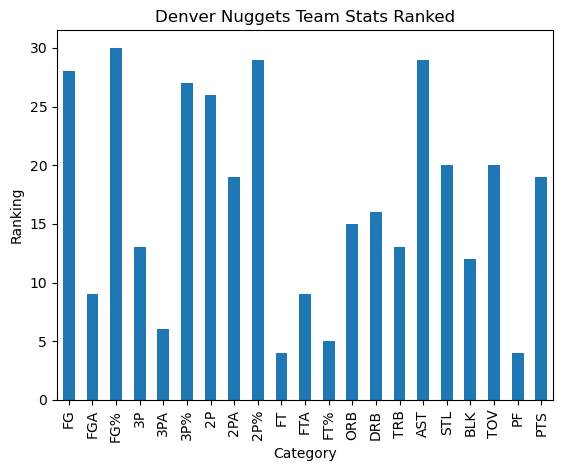

In [6]:
denver.plot.bar()
plt.title('Denver Nuggets Team Stats Ranked')
plt.xlabel('Category')
plt.ylabel('Ranking')
plt.show()

We reversed the rankings to show higher bars for the categories that the team did better in. We can see that the Denver Nuggets most acceled at FG% which emcompasses every shot taken (excpet free throws) as they were the league leader. This was probably most key in their playoff run as if you make shots at a higher posession, you are most likely to score more points (barring free throws and turnovers). Surprisngly, the Denver Nuggets do not shoot the many 3 pointers like the rest of the league as the league has centered more around the 3 ball in recent years due to players like Stephen Curry. However, when the Nuggets do shoot 3 pointers, they still make them at a very high rate compared to the rest of the league.

The Nuggets had the best record last year in the NBA and did eventually win the NBA Championship. The runner ups however, finished with the 8th seed in their own conference (out of 15). Let's see how the Miami Heat stack up compared to the rest of the league.

In [7]:
miami = dfRank.loc['Miami Heat'].copy()
# reverse rankings
miami = miami.map(lambda x: 31 -x)

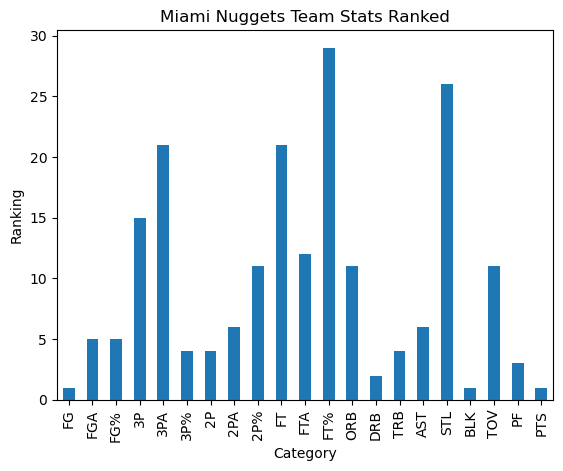

In [8]:
miami.plot.bar()
plt.title('Miami Nuggets Team Stats Ranked')
plt.xlabel('Category')
plt.ylabel('Ranking')
plt.show()

The Miami Heat were top in the league in only two categories. Free throw percentage can be clutch during playoff time and during big moments but the Miami Heat were not taking a lot of free throws to begin with. An interesting category to notice is that they rank highly in steals but, does still could not lead to many points or shooting with a higher field goal percentage as they ranked towards the bottom in the league. There are factors such as pace of play that may have affected these statistics as well as the playoffs sometimes being an entirely different ball game when it comes to how players are managed when it comes to minutes and those who do / do not play during games.

To get a better look at these teams again, we can try using a new data source and more advanced statistics such as statistics per 100 possessions, that helps standardize the data based on pace of play, a factor as to why Miami's rankings might be low.

In [9]:
# Load data
dfAdvanced = pd.read_csv('dataAdvanced.csv')

dfAdvanced

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,FT/FGA,Unnamed: 22,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G
0,1.0,Boston Celtics*,27.4,57.0,25.0,57,25,6.52,-0.15,6.38,...,0.197,NaN,0.528,11.3,78.5,0.180,NaN,TD Garden,766240,18689
1,2.0,Cleveland Cavaliers*,25.4,51.0,31.0,55,27,5.38,-0.15,5.23,...,0.206,NaN,0.535,14.4,76.3,0.210,NaN,Rocket Mortgage Fieldhouse,777280,18958
2,3.0,Philadelphia 76ers*,28.2,54.0,28.0,52,30,4.32,0.06,4.37,...,0.250,NaN,0.541,13.0,77.2,0.217,NaN,Wells Fargo Center,839261,20470
3,4.0,Memphis Grizzlies*,24.4,51.0,31.0,51,31,3.94,-0.34,3.60,...,0.190,NaN,0.526,13.1,75.9,0.206,NaN,FedEx Forum,707836,17264
4,5.0,Milwaukee Bucks*,29.8,58.0,24.0,50,32,3.63,-0.02,3.61,...,0.184,NaN,0.520,10.4,77.8,0.175,NaN,Fiserv Forum,718786,17531
5,6.0,Denver Nuggets*,26.6,53.0,29.0,49,33,3.33,-0.29,3.04,...,0.194,NaN,0.543,12.2,76.4,0.201,NaN,Ball Arena,788635,19235
6,7.0,New York Knicks*,24.5,47.0,35.0,48,34,2.93,0.06,2.99,...,0.217,NaN,0.536,11.4,77.1,0.210,NaN,Madison Square Garden (IV),795110,19393
7,8.0,Sacramento Kings*,25.4,48.0,34.0,47,35,2.65,-0.35,2.30,...,0.225,NaN,0.563,12.6,77.2,0.203,NaN,Golden 1 Center,715491,17451
8,9.0,Phoenix Suns*,28.1,45.0,37.0,46,36,2.07,0.01,2.08,...,0.191,NaN,0.532,12.9,76.0,0.234,NaN,Footprint Center,699911,17071
9,10.0,New Orleans Pelicans*,25.9,42.0,40.0,46,36,1.89,-0.26,1.63,...,0.221,NaN,0.543,13.4,77.4,0.212,NaN,Smoothie King Center,687691,16773


In [10]:
# remove unwanted columns and cleanup data structure
dfAdvanced = dfAdvanced.drop(['Rk', 'L', 'PL', 'MOV', 'SOS', 'SRS', 'Unnamed: 17', 'Unnamed: 22', 'Unnamed: 27', 'Arena', 'Attend.', 'Attend./G'], axis=1)
dfAdvanced = dfAdvanced[:-1]
dfAdvanced['Team'] = dfAdvanced['Team'].str.replace('*', '', regex=True)
dfAdvanced.set_index('Team', inplace = True)
dfAdvanced = dfAdvanced.rename(columns={'eFG%': 'OeFG%', 'TOV%': 'OTOV%', 'FT/FGA': 'OFT/FGA', 'eFG%.1': 'DeFG%', 'TOV%.1': 'DTOV%', 'FT/FGA.1': 'DFT/FGA'})
dfAdvanced

,Age,W,PW,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,OeFG%,OTOV%,ORB%,OFT/FGA,DeFG%,DTOV%,DRB%,DFT/FGA
Team,,,,,,,,,,,,,,,,,,
Boston Celtics,27.4,57.0,57,118.0,111.5,6.5,98.5,0.243,0.480,0.600,0.566,12.0,22.1,0.197,0.528,11.3,78.5,0.180
Cleveland Cavaliers,25.4,51.0,55,116.1,110.6,5.5,95.7,0.264,0.371,0.590,0.556,12.3,23.6,0.206,0.535,14.4,76.3,0.210
Philadelphia 76ers,28.2,54.0,52,117.7,113.3,4.4,96.9,0.300,0.389,0.608,0.563,12.6,21.6,0.250,0.541,13.0,77.2,0.217
Memphis Grizzlies,24.4,51.0,51,115.1,111.2,3.9,101.1,0.259,0.372,0.570,0.540,11.7,26.5,0.190,0.526,13.1,75.9,0.206
Milwaukee Bucks,29.8,58.0,50,115.4,111.9,3.5,100.5,0.248,0.446,0.583,0.555,12.7,25.0,0.184,0.520,10.4,77.8,0.175
Denver Nuggets,26.6,53.0,49,117.6,114.2,3.4,98.1,0.259,0.361,0.601,0.573,13.1,24.8,0.194,0.543,12.2,76.4,0.201
New York Knicks,24.5,47.0,48,117.8,114.8,3.0,97.1,0.285,0.400,0.577,0.541,11.4,28.3,0.217,0.536,11.4,77.1,0.210
Sacramento Kings,25.4,48.0,47,119.4,116.8,2.6,100.3,0.284,0.423,0.608,0.572,12.0,22.7,0.225,0.563,12.6,77.2,0.203
Phoenix Suns,28.1,45.0,46,115.1,113.0,2.1,98.2,0.241,0.362,0.570,0.535,12.0,26.6,0.191,0.532,12.9,76.0,0.234


In [11]:
dfRankAdvanced = dfAdvanced.rank(ascending=False, method='min').astype(int)
dfRankAdvanced

,Age,W,PW,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,OeFG%,OTOV%,ORB%,OFT/FGA,DeFG%,DTOV%,DRB%,DFT/FGA
Team,,,,,,,,,,,,,,,,,,
Boston Celtics,10,2,1,2,28,1,19,27,2,4,4,22,25,23,28,26,1,28
Cleveland Cavaliers,18,5,2,8,30,2,30,16,17,9,9,18,17,17,24,3,13,16
Philadelphia 76ers,3,3,3,4,22,3,27,1,12,1,6,16,26,1,18,10,7,9
Memphis Grizzlies,25,5,4,14,29,4,4,19,15,23,21,25,6,27,29,8,18,18
Milwaukee Bucks,1,1,5,12,27,5,10,25,4,15,10,13,9,28,30,30,2,29
Denver Nuggets,12,4,6,5,15,6,23,19,21,3,1,7,11,25,15,17,12,22
New York Knicks,23,8,7,3,12,7,25,7,10,20,19,26,2,10,23,25,9,16
Sacramento Kings,18,7,8,1,6,8,12,9,5,1,2,22,22,6,4,13,7,21
Phoenix Suns,4,9,9,14,24,9,22,28,20,23,22,22,5,26,26,12,16,1


In [12]:
denverAdvanced = dfRankAdvanced.loc['Denver Nuggets'].copy()
# reverse rankings
denverAdvanced = denverAdvanced.map(lambda x: 31 -x)

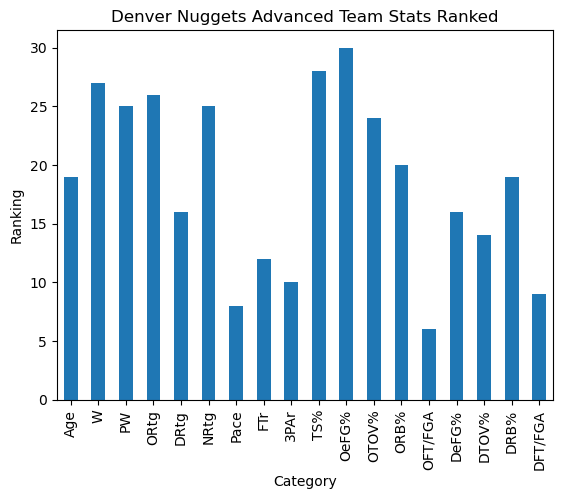

In [13]:
denverAdvanced.plot.bar()
plt.title('Denver Nuggets Advanced Team Stats Ranked')
plt.xlabel('Category')
plt.ylabel('Ranking')
plt.show()

As we can see again with Denver, their field goal and offensive statistics are upon the league's best while their defense ranks in the middle.

In [14]:
miamiAdvanced = dfRankAdvanced.loc['Miami Heat'].copy()
# reverse rankings
miamiAdvanced = miamiAdvanced.map(lambda x: 31 -x)

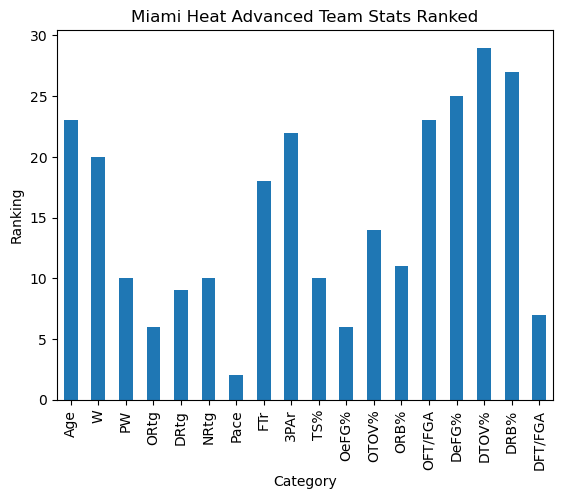

In [15]:
miamiAdvanced.plot.bar()
plt.title('Miami Heat Advanced Team Stats Ranked')
plt.xlabel('Category')
plt.ylabel('Ranking')
plt.show()

Surprisingly, the Miami Heat even with standardized statistics, did not perform very well during the regular season, especially on offense (hence their 8th place finish) but, were still able to finish top 2 among the league.

## Conclusion

As stated before, there are still many other internal and external factors that may explain why the Miami Heat were able to go on a deep playoff run last year despite, having some of the worst offensive and defensive statistics in the league during the regular season. Something to look into more depth would to be to look at just their regular season finish because Miami was able to knock off the number 1 and 2 seed in their conference during the playoffs when those teams might have much better statistics compared to the rest of the league. However, any sports league isn't just about the regular season. A team's ability to perform better during the playoffs may not always reflect analytics as shown.